In [43]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import minimize

In [44]:
f = lambda x, y: -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

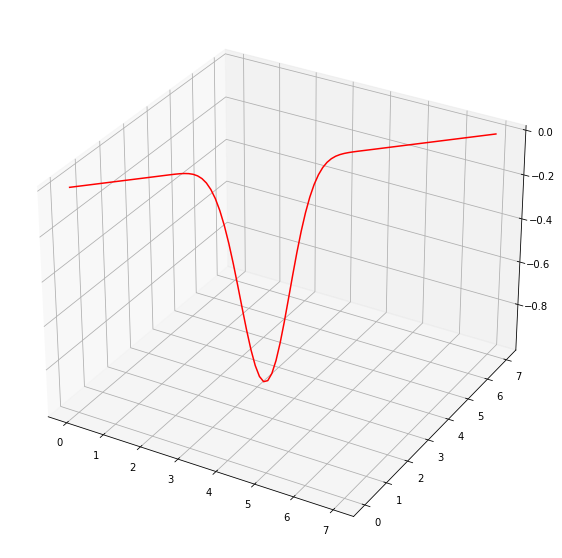

In [45]:
x = np.linspace(0, 7, num=100)
y = np.linspace(0, 7, num=100)
z = f(x, y)
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'red')
plt.show()

In [51]:
def gradient_descend(function, start_point, step=1e-4, eps=1e-8):
    counter = 1
    differences = np.array([])
    iterations = np.array([])
    while True:
        func = function(start_point[0], start_point[1])
        x = start_point[0] - step * (function(start_point[0] + eps, start_point[1]) - function(start_point[0], start_point[1])) / eps
        y = start_point[1] - step * (function(start_point[0], start_point[1] + eps) - function(start_point[0], start_point[1])) / eps
        func_new = function(x, y)
        diff = func - func_new
        if np.abs(diff) >= 1e-12:
            differences = np.append(differences, diff)
            iterations = np.append(iterations, counter)
            counter += 1
            start_point = [x, y]
        else:
            print('function:', func_new,
                  '\nx:', x,
                  '\ny:', y,
                  '\niterations:', counter)
            return differences, iterations, func_new

In [52]:
grad_diff, grad_iter, _ = gradient_descend(f, [4, 4])

function: -0.9999999983351392 
x: 3.141616211042849 
y: 3.141616211042849 
iterations: 42183


In [48]:
f_min = lambda x: f(x[0], x[1])
res = minimize(f_min, [4, 4], method='BFGS', tol=1e-6)
res

      fun: -0.9999999999999999
 hess_inv: array([[ 0.66666956, -0.33333044],
       [-0.33333044,  0.66666956]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([3.14159265, 3.14159265])

In [57]:
def adam(function, start_point, eps=1e-8, lr=0.001, bettas=(0.9, 0.999)):
    start_point = np.array(start_point)
    first_moment = np.array([0, 0])
    second_moment = np.array([0, 0])
    differences = np.array([])
    iterations = np.array([])
    counter = 1
    while True:
        func = function(start_point[0], start_point[1])
        gradient = np.array([(function(start_point[0] + eps, start_point[1]) - function(start_point[0], start_point[1])) / eps,
                             (function(start_point[0], start_point[1] + eps) - function(start_point[0], start_point[1])) / eps])
        first_moment = bettas[0] * first_moment + (1 - bettas[0]) * gradient
        second_moment = bettas[1] * second_moment + (1 - bettas[1]) * (gradient * gradient)
        first_moment_hat = first_moment / (1 - np.power(bettas[0], counter))
        second_moment_hat = second_moment / (1 - np.power(bettas[1], counter))
        start_point = start_point - lr * first_moment_hat / (np.sqrt(second_moment_hat) + eps)
        diff = func - function(start_point[0], start_point[1])
        if np.abs(diff) >= 1e-12:
            differences = np.append(differences, diff)
            iterations = np.append(iterations, counter)
            counter += 1
        else:
            print('function:', func,
                  '\nx:', start_point[0],
                  '\ny:', start_point[1],
                  '\niterations:', counter)
            return differences, iterations, func

In [58]:
adam_diff, adam_iter, _ = adam(f, [4, 4])

function: -0.9999999999624485 
x: 3.1415961445568277 
y: 3.1415961445568277 
iterations: 1832


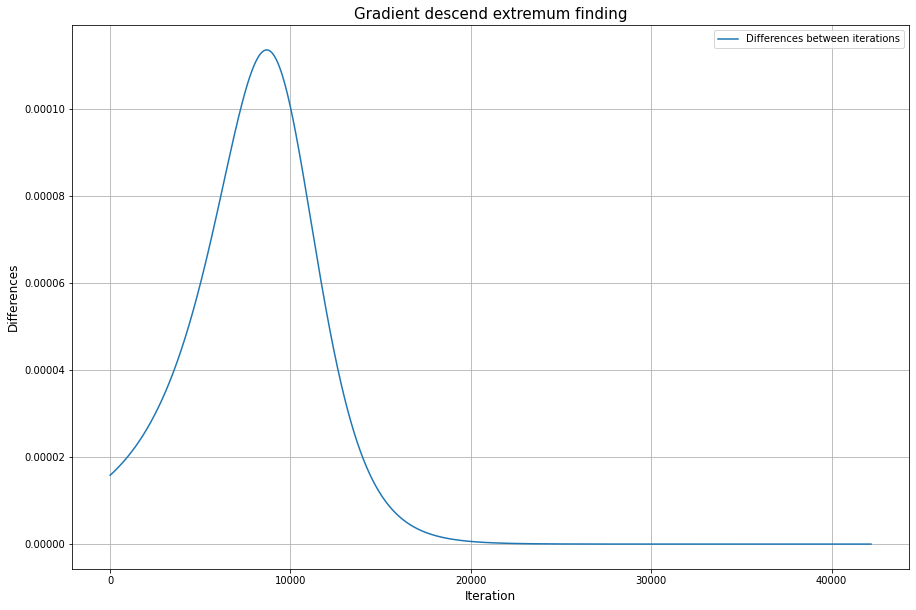

In [60]:
plt.figure(figsize=(15, 10))
plt.plot(grad_iter, grad_diff, label="Differences between iterations")
plt.title('Gradient descend extremum finding', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Differences', fontsize=12)
plt.legend()
plt.grid(True)

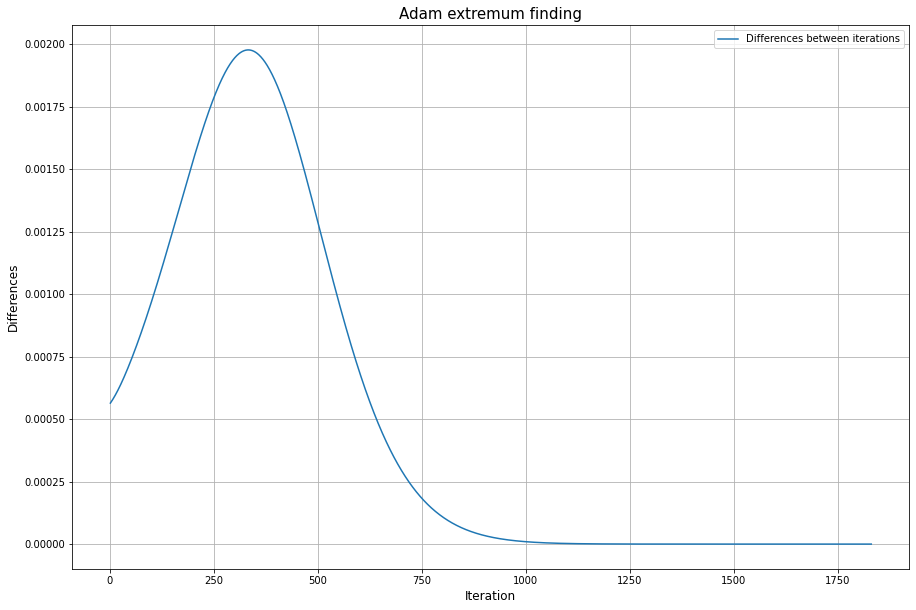

In [61]:
plt.figure(figsize=(15, 10))
plt.plot(adam_iter, adam_diff, label="Differences between iterations")
plt.title('Adam extremum finding', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Differences', fontsize=12)
plt.legend()
plt.grid(True)